##Analyzing data
Name: Jhanelle Williams


###Libraries used to load Data

In [2]:
#import libraries
import pandas as pd
import numpy as np

The Pandas library was chosen to upload the data as pandas can accept relatively large data size. Additionally, with Pandas most commands and features are built therefore it one of the most efficient libraries. 

In [3]:
# show plots in the notebook
% matplotlib inline

# these the are limitations we are setting for panda

from pandas import set_option
set_option('display.max_rows', 20)

In [4]:
# The data was uploaded in the table format for easy display. Only 20 rows are dislayed to get a gist of the data. 

filename= "data/behav_2.dat"

bdata = pd.read_table("data/behav_2.dat", sep ='\s+')

bdata


,date,plate,time,strain,frame,ID,persistance,area,speed,angularspeed,...,bias,pathlen,curve,dir,loc_x,loc_y,vel_x,vel_y,orient,crab
0,20141118,20141118_131037,15.028,wild-type,0,1,234.9,0.096228,NaN,NaN,...,1,0.000,38.2,0,29.0036,29.4805,NaN,NaN,103.3,NaN
1,20141118,20141118_131037,15.069,wild-type,1,1,234.9,0.096957,NaN,NaN,...,1,0.010,32.7,0,29.0076,29.4713,NaN,NaN,103.1,NaN
2,20141118,20141118_131037,15.109,wild-type,2,1,234.9,0.096957,NaN,NaN,...,1,0.019,34.0,0,29.0113,29.4630,NaN,NaN,102.8,NaN
3,20141118,20141118_131037,15.148,wild-type,3,1,234.9,0.095499,NaN,NaN,...,1,0.027,33.5,0,29.0138,29.4550,NaN,NaN,102.2,NaN
4,20141118,20141118_131037,15.186,wild-type,4,1,234.9,0.095499,NaN,NaN,...,1,0.036,34.2,0,29.0172,29.4475,NaN,NaN,102.1,NaN
5,20141118,20141118_131037,15.229,wild-type,5,1,234.9,0.096228,NaN,NaN,...,1,0.044,34.4,0,29.0197,29.4397,NaN,NaN,102.3,NaN
6,20141118,20141118_131037,15.270,wild-type,6,1,234.9,0.100602,NaN,NaN,...,1,0.054,35.0,0,29.0225,29.4302,NaN,NaN,102.4,NaN
7,20141118,20141118_131037,15.310,wild-type,7,1,234.9,0.100602,0.1914,1.3,...,1,0.061,33.8,0,29.0251,29.4233,0.0640,-0.1804,102.3,0.0240
8,20141118,20141118_131037,15.350,wild-type,8,1,234.9,0.099873,0.1844,0.9,...,1,0.069,33.7,0,29.0278,29.4162,0.0593,-0.1746,102.4,0.0205
9,20141118,20141118_131037,15.387,wild-type,9,1,234.9,0.099144,0.1807,1.1,...,1,0.077,33.7,0,29.0309,29.4083,0.0579,-0.1712,102.3,0.0201


## Explanation of Functions Used

3 Functions executed in this notebook using pandas are:


a) extracting particular columns as seen in In[27]


b) performing mathematical calculations on the data


c) developing graphs using data created


d) converting the new data into a readable format


These functions were created as I wanted to have a better understanding of the rate of speed of worms. This rate will provide insightful understanding of the data, rather than just using using the data as given. A graph of this rate was created as it provides clear visual of the data, thus being able to make more concrete conclusions about the experiment. 

In [5]:

bdata [['time','speed']]

,time,speed
0,15.028,NaN
1,15.069,NaN
2,15.109,NaN
3,15.148,NaN
4,15.186,NaN
5,15.229,NaN
6,15.270,NaN
7,15.310,0.1914
8,15.350,0.1844
9,15.387,0.1807


In [6]:
# Equation to find the rate of the worms as they moved along the petri dish

bdata['rate']= bdata['speed']/bdata['time']

In [7]:
bdata['rate']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7         0.012502
8         0.012013
9         0.011744
            ...   
507144    0.000014
507145    0.000008
507146         NaN
507147         NaN
507148         NaN
507149         NaN
507150         NaN
507151         NaN
507152         NaN
507153         NaN
Name: rate, dtype: float64

In [ ]:
#Converted data to csv file so that it can be easily accessible by different computers, hence the to.csv file was the best argument for the data.

bdata.to_csv('data/bdata_rate.csv', sep= ',')

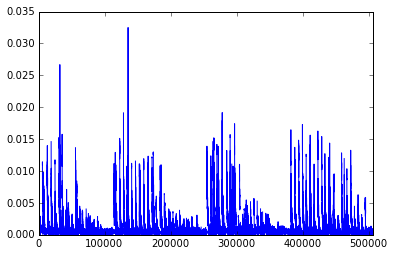

In [48]:
#Apply plot function for new data variable created

bdata["rate"].plot()

# New insight about the data set
 
Based on the values of the rate, it seems as if there is an adapatation stage that the worms underwent. This new insight is based on the fact that during the initial and final times the rate of the worms were low while during the peak of the experiment there was greater response to the stimuli. 